Mauricio Muñoz
bladimir moya
Machine Learning


# Count the occurrences of each unique value in the 'target' column
target_counts = df['Region'].value_counts()

# Print the counts
target_counts

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


hipotesis: los clientes con caracteristicas similares a edad, renta y antiguedad tienden a pertener a grupos con patrones especificos de uso de cupos

In [4]:

# Conexión y carga de archivos en Google Colab
from google.colab import files  # Subir y descargar archivos
from google.colab import drive  # Conectar Google Drive


In [5]:
drive.mount('/content/drive')

#rt ="/content/drive/MyDrive/Base_clientes_Monopoly THIS.xlsx"
rt="/content/drive/MyDrive/Base_clientes_Monopoly-0.xlsx"# poner la ruta de tu monopoli.xlsx que tienes en tu drive

df = pd.read_excel(rt)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


In [6]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


df.head: se logra visualizar todos los datos del dataset.

#**Preparando los datos**

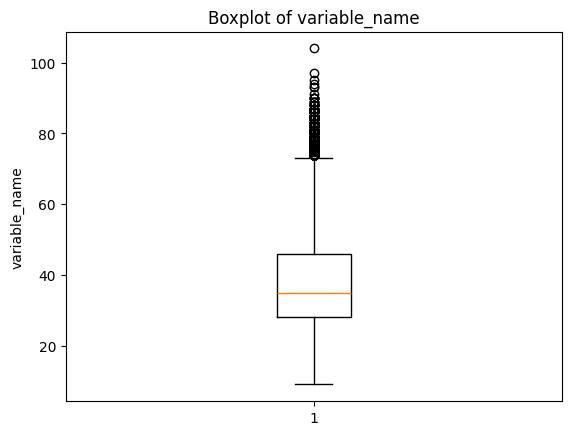

In [7]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['Edad'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

en este grafico de cajas se logra visualizar los outliers, y en el numero 75 comienzan los outliers
---



In [8]:
# prompt: generar codigo query que me de la variable edad con outliers un comparador de signo mayor que 75  y que me diga cuantos son mayores que ese numero

# Filtrar los valores de 'Edad' mayores que 75
outliers_edad = df[df['Edad'] > 75]

# Contar la cantidad de outliers
cantidad_outliers = len(outliers_edad)

print(f"Hay {cantidad_outliers} valores de Edad mayores que 75.")

Hay 538 valores de Edad mayores que 75.


en este codigo se logra visualizar la cantidad de outliers que tiene la variable edad a partir del numero 75

In [9]:
# prompt: eliminar los outliers mayores que 75

# Eliminar los valores de 'Edad' mayores que 75
df = df[df['Edad'] <= 75]

# Verificar la nueva forma del DataFrame
print(df['Edad'].shape)

(50586,)


se eliminan los valores mayores que 75 (outliers)

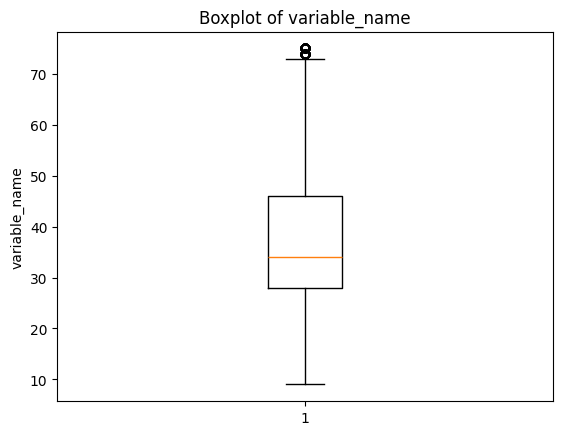

In [10]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['Edad'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [11]:
df["Edad"].info()

<class 'pandas.core.series.Series'>
Index: 50586 entries, 0 to 51123
Series name: Edad
Non-Null Count  Dtype
--------------  -----
50586 non-null  int64
dtypes: int64(1)
memory usage: 790.4 KB


In [12]:
df["Antiguedad"].info()

<class 'pandas.core.series.Series'>
Index: 50586 entries, 0 to 51123
Series name: Antiguedad
Non-Null Count  Dtype
--------------  -----
50586 non-null  int64
dtypes: int64(1)
memory usage: 790.4 KB


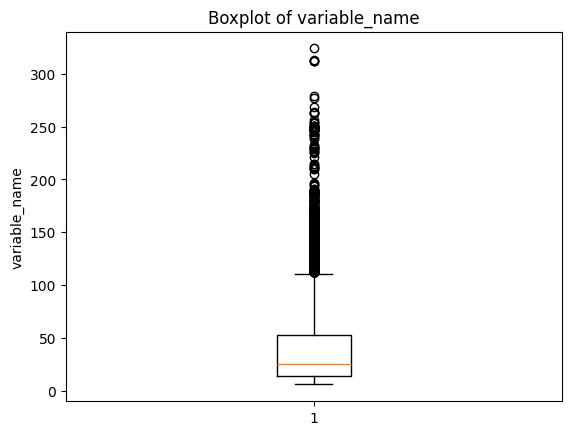

In [13]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['Antiguedad'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [14]:
# prompt: generar codigo query que me de la variable edad con outliers un comparador de signo mayor que 75  y que me diga cuantos son mayores que ese numero

# Filtrar los valores de 'Edad' mayores que 75
outliers_edad = df[df['Antiguedad'] > 100]

# Contar la cantidad de outliers
cantidad_outliers = len(outliers_edad)

print(f"Hay {cantidad_outliers} valores de antiguedad mayores que 100.")

Hay 3858 valores de antiguedad mayores que 100.


In [15]:
# prompt: eliminar los outliers mayores que 75

# Eliminar los valores de 'Edad' mayores que 75
df = df[df['Antiguedad'] <= 100]

# Verificar la nueva forma del DataFrame
print(df['Antiguedad'].shape)

(46728,)


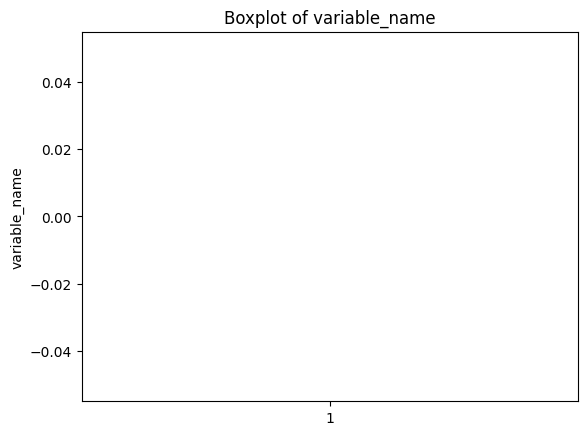

In [16]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['Renta'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [17]:
df["Renta"].info()

<class 'pandas.core.series.Series'>
Index: 46728 entries, 1 to 51123
Series name: Renta
Non-Null Count  Dtype  
--------------  -----  
35170 non-null  float64
dtypes: float64(1)
memory usage: 730.1 KB


In [18]:
# prompt: generar codigo que borre los nulos de la variable especifica "Renta"

# Eliminar filas con valores nulos en la columna 'Renta'
df = df.dropna(subset=['Renta'])

In [19]:
df["Renta"].info()

<class 'pandas.core.series.Series'>
Index: 35170 entries, 1 to 51123
Series name: Renta
Non-Null Count  Dtype  
--------------  -----  
35170 non-null  float64
dtypes: float64(1)
memory usage: 549.5 KB


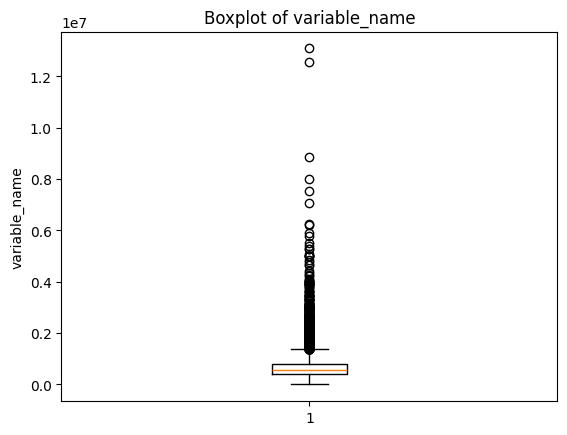

In [20]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['Renta'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [21]:
# prompt: generar codigo eliminar todos los outliers de la variable Renta

import pandas as pd
import numpy as np

# ... (Your existing code for loading the data) ...

# Calculate the IQR for Renta
Q1 = df['Renta'].quantile(0.25)
Q3 = df['Renta'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df = df[(df['Renta'] >= lower_bound) & (df['Renta'] <= upper_bound)]

# You can also use Z-score method to remove outliers
# z = np.abs((df['Renta'] - df['Renta'].mean()) / df['Renta'].std())
# df = df[(z < 3)]

# ... (Your remaining code) ...

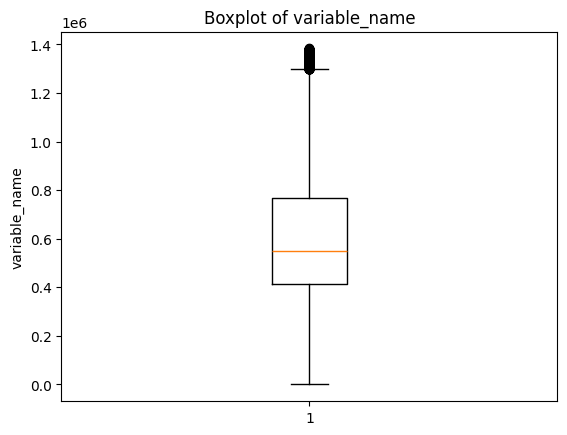

In [22]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['Renta'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [23]:
df["Antiguedad"].info()

<class 'pandas.core.series.Series'>
Index: 33719 entries, 1 to 51123
Series name: Antiguedad
Non-Null Count  Dtype
--------------  -----
33719 non-null  int64
dtypes: int64(1)
memory usage: 526.9 KB


In [24]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1


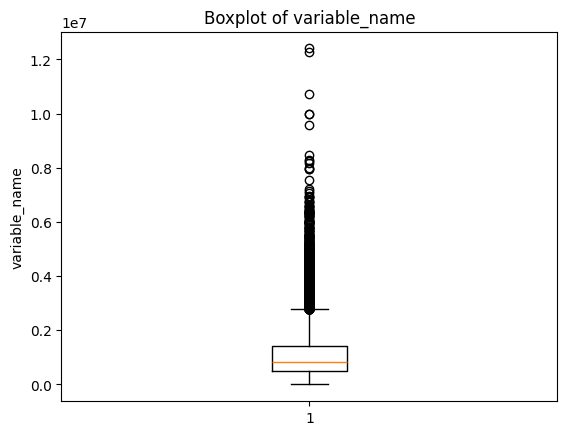

In [25]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['CUPO_L1'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [26]:
# prompt: generar codigo eliminar todos los outliers de la variable CUPO_L1

import pandas as pd
import numpy as np

# ... (Your existing code for loading the data) ...

# Calculate the IQR for Renta
Q1 = df['CUPO_L1'].quantile(0.25)
Q3 = df['CUPO_L1'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df = df[(df['CUPO_L1'] >= lower_bound) & (df['CUPO_L1'] <= upper_bound)]

# You can also use Z-score method to remove outliers
# z = np.abs((df['Renta'] - df['Renta'].mean()) / df['Renta'].std())
# df = df[(z < 3)]

# ... (Your remaining code) ...

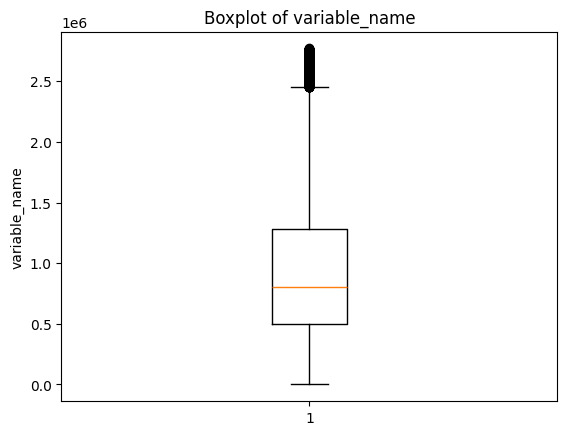

In [27]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['CUPO_L1'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

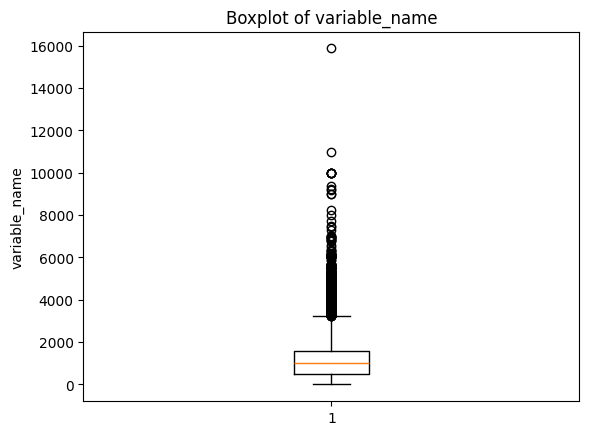

In [28]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['CUPO_MX'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [29]:
# prompt: generar codigo eliminar todos los outliers de la variable CUPO_L1

import pandas as pd
import numpy as np

# ... (Your existing code for loading the data) ...

# Calculate the IQR for Renta
Q1 = df['CUPO_MX'].quantile(0.25)
Q3 = df['CUPO_MX'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df = df[(df['CUPO_MX'] >= lower_bound) & (df['CUPO_MX'] <= upper_bound)]

# You can also use Z-score method to remove outliers
# z = np.abs((df['Renta'] - df['Renta'].mean()) / df['Renta'].std())
# df = df[(z < 3)]

# ... (Your remaining code) ...

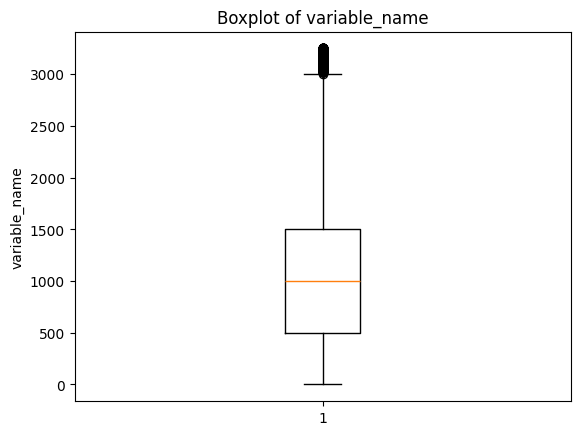

In [30]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['CUPO_MX'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

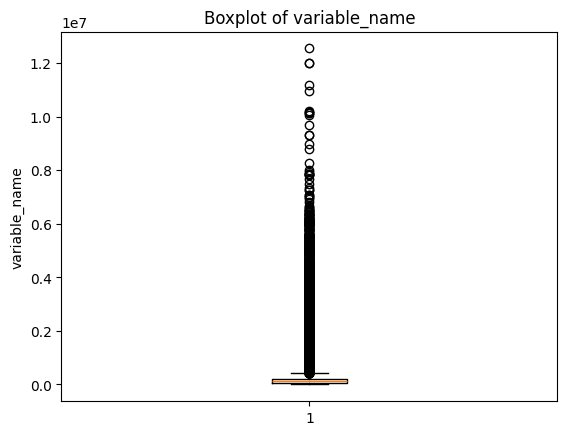

In [31]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['CUPO_L2'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [32]:
# prompt: generar codigo eliminar todos los outliers de la variable CUPO_L1

import pandas as pd
import numpy as np

# ... (Your existing code for loading the data) ...

# Calculate the IQR for Renta
Q1 = df['CUPO_L2'].quantile(0.25)
Q3 = df['CUPO_L2'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df = df[(df['CUPO_L2'] >= lower_bound) & (df['CUPO_L2'] <= upper_bound)]

# You can also use Z-score method to remove outliers
# z = np.abs((df['Renta'] - df['Renta'].mean()) / df['Renta'].std())
# df = df[(z < 3)]

# ... (Your remaining code) ...

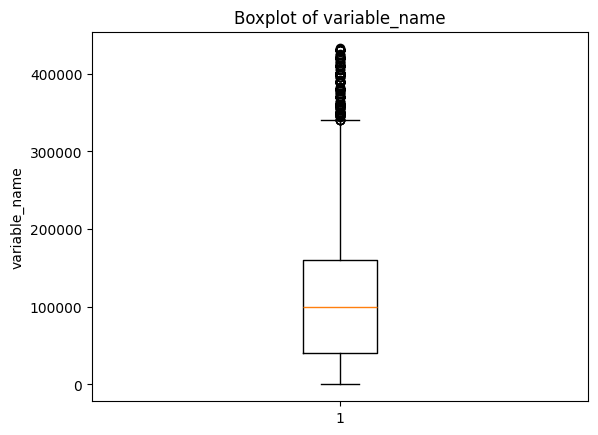

In [33]:
# prompt: generame un grafico de caja de una sola variable

import matplotlib.pyplot as plt

# Assuming 'variable_name' is the column you want to plot
plt.boxplot(df['CUPO_L2'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [34]:
# prompt: contar valores iguales a 1 en la variable CUPO_L2

count_ones = (df['CUPO_L2'] > 300000).sum()
print(f"The number of values equal to 1 in CUPO_L2 is: {count_ones}")

The number of values equal to 1 in CUPO_L2 is: 1075


The number of values equal to 1 in CUPO_L2 is now: 0


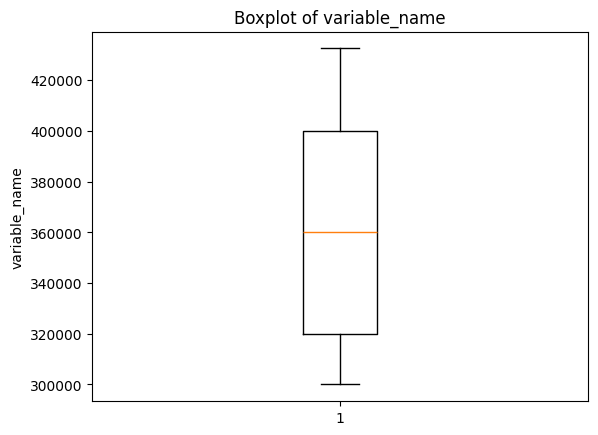

In [35]:
# prompt: borrar lo valores iguales a 1 de la variable CUPO_L2

# Remove rows where 'CUPO_L2' is equal to 1
df = df[df['CUPO_L2'] > 300000]

# Verify the change (optional)
count_ones = (df['CUPO_L2'] == 1).sum()
print(f"The number of values equal to 1 in CUPO_L2 is now: {count_ones}")
plt.boxplot(df['CUPO_L2'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [36]:
df.shape

(1075, 574)

In [37]:
# prompt: contar los datos nulos de las variables y sumar los totales

# Check for null values in each column
null_counts = df.isnull().sum()

# Print the total number of null values
total_nulls = null_counts.sum()
print(f"\nTotal number of null values across all columns: {total_nulls}")

# Print null values per column
print("\nNull values per column:")
null_counts


Total number of null values across all columns: 27304

Null values per column:


,0
Id,0
Subsegmento,0
Sexo,0
Region,1
Edad,0
...,...
UsoL1_T01,0
UsoL2_T01,0
UsoLI_T01,0
IndRev_T01,0


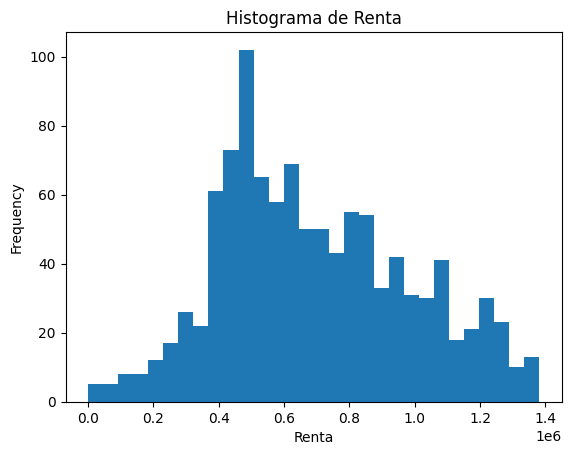

In [38]:
# prompt: histograma de la variable renta

plt.hist(df['Renta'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('Renta')
plt.ylabel('Frequency')
plt.title('Histograma de Renta')
plt.show()

In [39]:
# prompt: matriz de correlacion de person con la variable target y omitir los str, y que me muestre el resultado como porcentaje

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)

# Drop the target variable from the numerical DataFrame
# Assuming 'target_variable' is the name of your target column
if 'target' in numerical_df.columns:
    numerical_df = numerical_df.drop('target', axis=1)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corrwith(df['target'])

# Convert correlation to percentage
correlation_percentage = correlation_matrix * 100

# Print the correlation matrix as percentage
correlation_percentage

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
Id,5.954983
Subsegmento,3.504327
Region,-3.642719
Edad,10.559860
Renta,-3.733293
...,...
EeccNac_T01,18.769729
EeccInt_T01,1.345002
UsoL1_T01,18.253248
UsoL2_T01,-3.745411


identificar patrones con correlacion positiva entre las variables escogidas

In [40]:
# Convert the list of lists to a DataFrame
variables_df = pd.DataFrame(df, columns=['Renta', 'Antiguedad', 'Edad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'target','Region','Sexo','Ctacte'])

# Display the variables in the DataFrame
variables_df

,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,target,Region,Sexo,Ctacte
36,528152.0,27,48,2160000,320000.0,2000.0,0,13.0,H,1
54,474696.0,23,35,1575000,320000.0,2350.0,0,10.0,H,1
82,1118632.0,16,42,2000000,400000.0,3200.0,0,13.0,H,1
109,520568.0,7,47,1600000,320000.0,3000.0,0,13.0,H,1
126,1090804.0,7,47,2000000,400000.0,2000.0,0,8.0,H,1
...,...,...,...,...,...,...,...,...,...,...
50933,659000.0,70,50,1477000,420000.0,819.0,0,13.0,H,1
51008,146779.0,56,49,500000,400000.0,500.0,0,5.0,H,1
51022,503295.0,10,51,1600000,320000.0,3000.0,0,13.0,H,1
51089,667330.0,95,47,2531160,430000.0,2198.0,0,13.0,H,1


arreglo de variables

In [41]:
# prompt: eliminar datos nulos de la variable region de todo el data set

# Eliminar filas con valores nulos en la columna 'Region'
variables_df = variables_df.dropna(subset=['Region'])

In [42]:
# prompt: calcular total de nulos de cada variables y sumar los totales

# Check for null values in each column
null_counts = variables_df.isnull().sum()

# Print the total number of null values
total_nulls = null_counts.sum()
print(f"\nTotal number of null values across all columns: {total_nulls}")

# Print null values per column
print("\nNull values per column:")
null_counts



Total number of null values across all columns: 0

Null values per column:


,0
Renta,0
Antiguedad,0
Edad,0
CUPO_L1,0
CUPO_L2,0
CUPO_MX,0
target,0
Region,0
Sexo,0
Ctacte,0


In [43]:
# prompt: cambiar variable sexo object a int

# Convert 'Sexo' column to numerical values
variables_df['Sexo'] = variables_df['Sexo'].astype('category').cat.codes

# Display the updated DataFrame info
variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 36 to 51090
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Renta       1074 non-null   float64
 1   Antiguedad  1074 non-null   int64  
 2   Edad        1074 non-null   int64  
 3   CUPO_L1     1074 non-null   int64  
 4   CUPO_L2     1074 non-null   float64
 5   CUPO_MX     1074 non-null   float64
 6   target      1074 non-null   int64  
 7   Region      1074 non-null   float64
 8   Sexo        1074 non-null   int8   
 9   Ctacte      1074 non-null   int64  
dtypes: float64(4), int64(5), int8(1)
memory usage: 85.0 KB


<ipython-input-43-4409f5e69293>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_df['Sexo'] = variables_df['Sexo'].astype('category').cat.codes


In [44]:
variables_df.head()

,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,target,Region,Sexo,Ctacte
36,528152.0,27,48,2160000,320000.0,2000.0,0,13.0,0,1
54,474696.0,23,35,1575000,320000.0,2350.0,0,10.0,0,1
82,1118632.0,16,42,2000000,400000.0,3200.0,0,13.0,0,1
109,520568.0,7,47,1600000,320000.0,3000.0,0,13.0,0,1
126,1090804.0,7,47,2000000,400000.0,2000.0,0,8.0,0,1


In [45]:
# prompt: contar valores de una variable

# Count the occurrences of each unique value in the 'Region' column
region_counts = df['Region'].value_counts()

# Print the counts
region_counts

,count
Region,
13.0,655
5.0,79
8.0,77
10.0,51
9.0,49
2.0,31
1.0,26
6.0,25
7.0,24


In [46]:
variables_df = pd.get_dummies(variables_df, columns=['Region'], prefix='Region', dtype=int)
variables_df.head(5)

,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,target,Sexo,Ctacte,Region_1.0,...,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,Region_10.0,Region_11.0,Region_12.0,Region_13.0
36,528152.0,27,48,2160000,320000.0,2000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
54,474696.0,23,35,1575000,320000.0,2350.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
82,1118632.0,16,42,2000000,400000.0,3200.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
109,520568.0,7,47,1600000,320000.0,3000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
126,1090804.0,7,47,2000000,400000.0,2000.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
# normalizar variables

# Assuming 'variables_df' is your DataFrame with the columns to normalize

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['Renta', 'Antiguedad', 'Edad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX']

# Fit the scaler to your data and transform the selected columns
variables_df[columns_to_normalize] = scaler.fit_transform(variables_df[columns_to_normalize])

# Now, the specified columns in 'variables_df' are normalized between 0 and 1.
variables_df.head()

,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,target,Sexo,Ctacte,Region_1.0,...,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,Region_10.0,Region_11.0,Region_12.0,Region_13.0
36,0.382374,0.223404,0.500000,0.763454,0.150879,0.615385,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
54,0.343673,0.180851,0.259259,0.535586,0.150879,0.723077,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
82,0.809874,0.106383,0.388889,0.701131,0.754425,0.984615,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
109,0.376884,0.010638,0.481481,0.545324,0.150879,0.923077,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
126,0.789727,0.010638,0.481481,0.701131,0.754425,0.615385,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
X = variables_df.drop(columns=['target'])

In [49]:
X.head()

,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,Sexo,Ctacte,Region_1.0,Region_2.0,...,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,Region_10.0,Region_11.0,Region_12.0,Region_13.0
36,0.382374,0.223404,0.500000,0.763454,0.150879,0.615385,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
54,0.343673,0.180851,0.259259,0.535586,0.150879,0.723077,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
82,0.809874,0.106383,0.388889,0.701131,0.754425,0.984615,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
109,0.376884,0.010638,0.481481,0.545324,0.150879,0.923077,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
126,0.789727,0.010638,0.481481,0.701131,0.754425,0.615385,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
Z = variables_df

In [51]:
Z = Z.drop(columns=[col for col in Z.columns if 'Region' in col])
Z.head()

,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,target,Sexo,Ctacte
36,0.382374,0.223404,0.500000,0.763454,0.150879,0.615385,0,0,1
54,0.343673,0.180851,0.259259,0.535586,0.150879,0.723077,0,0,1
82,0.809874,0.106383,0.388889,0.701131,0.754425,0.984615,0,0,1
109,0.376884,0.010638,0.481481,0.545324,0.150879,0.923077,0,0,1
126,0.789727,0.010638,0.481481,0.701131,0.754425,0.615385,0,0,1


# fase 4: modelamiento

In [101]:
pip install kneed

Kmeans   pca = 2
cluster = 4

Porcentaje de varianza explicada por cada componente: [0.58425367 0.1112575 ]


<ipython-input-114-6f07d4b91727>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=pca_df1, s=100, alpha=0.7, marker='o', palette='viridis')


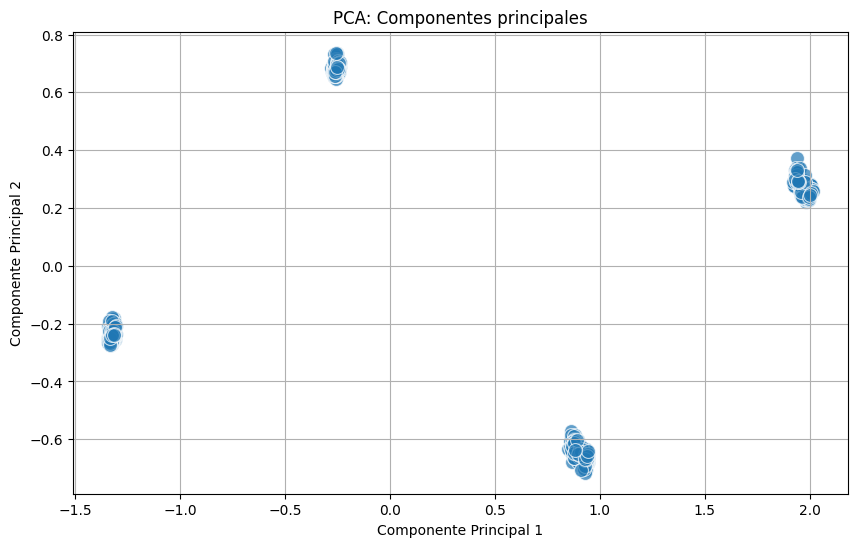

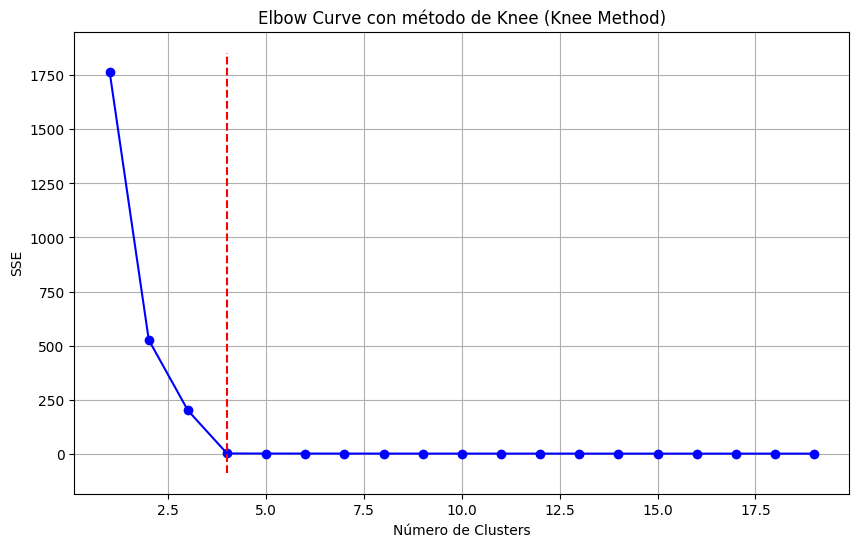

El número óptimo de clusters según el método del Knee es: 4


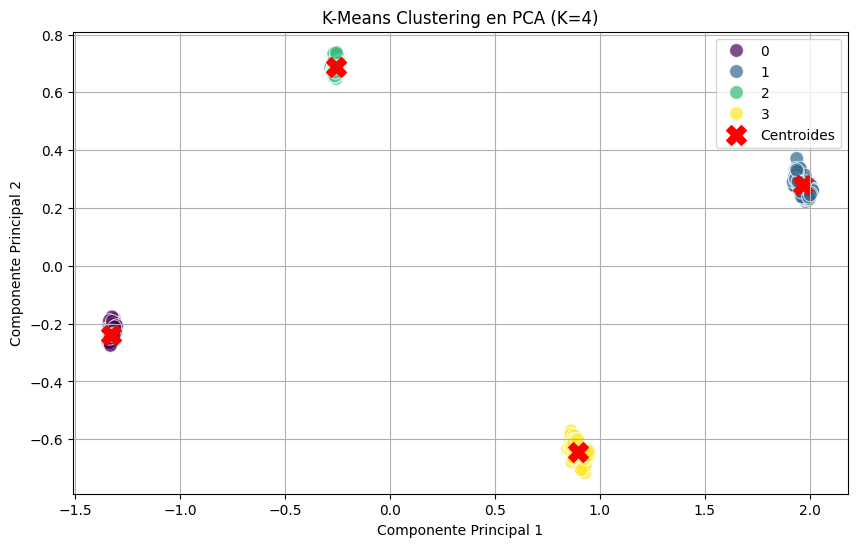


Centroides de los clusters:
        PC1       PC2
0 -1.327968 -0.239696
1  1.969669  0.278653
2 -0.257852  0.689075
3  0.897931 -0.645306
Silhouette Score: 0.978
Inercia (SSE) del modelo: 0.8163095524194014

Etiquetas de los clusters para cada punto:
Cluster
0    356
2    299
3    257
1    162
Name: count, dtype: int64

Resumen de los clusters (promedios de las variables):


,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,Sexo,Ctacte,Region_1.0,Region_2.0,...,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,Region_10.0,Region_11.0,Region_12.0,Region_13.0
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.557806,0.246534,0.348315,0.591336,0.426588,0.627793,0.0,0.946629,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.459530,0.273706,0.367856,0.581295,0.443458,0.651430,1.0,0.956790,0.061728,0.061728,...,0.018519,0.216049,0.049383,0.055556,0.197531,0.117284,0.123457,0.018519,0.055556,0.0
2,0.472145,0.258023,0.337483,0.574125,0.466552,0.623087,1.0,0.946488,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,0.497727,0.253953,0.390258,0.578185,0.482529,0.627855,0.0,0.984436,0.062257,0.081712,...,0.042802,0.171206,0.066148,0.058366,0.175097,0.116732,0.120623,0.027237,0.038911,0.0


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator  # Importar KneeLocator para detectar el codo

# Supón que ya tienes un DataFrame 'df' con tus datos

# Paso 1: Estandarización (si es necesario, ya que los datos ya pueden estar escalados)
# Si ya tienes tus datos normalizados, puedes saltarte esta parte.

# Paso 2: Aplicar PCA (reducción de dimensionalidad)
# Aquí se reducen las dimensiones a 2 para visualización
pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(X)

# Crear un DataFrame con las componentes principales
pca_df1 = pd.DataFrame(X_pca1, columns=['PC1', 'PC2'])

# Ver el porcentaje de varianza explicada por cada componente
print(f'Porcentaje de varianza explicada por cada componente: {pca.explained_variance_ratio_}')

# Graficar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df1, s=100, alpha=0.7, marker='o', palette='viridis')
plt.title('PCA: Componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Paso 3: Método del Codo (Elbow Method) con KneeLocator para determinar el número óptimo de clusters

# Definir el rango de números de clusters que queremos probar
num_clusters = range(1, 20)
inertias = []  # Sum of Squared Errors
silhouette_scores = []  # Silhouette Scores

# Aplicar K-Means para cada número de clusters y guardar la inercia y el Silhouette Score
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df1)  # Aplicar K-Means sobre los datos PCA
    inertias.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

    if k > 1:  # No se puede calcular el Silhouette Score para un solo cluster
        score = silhouette_score(pca_df1[['PC1', 'PC2']], kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # No hay Silhouette Score para k=1

# Encontrar el punto de inflexión usando KneeLocator
knee = KneeLocator(num_clusters, inertias, curve='convex', direction='decreasing')

# Graficar la curva de SSE vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertias, marker='o', linestyle='-', color='b')
plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')  # Línea en el codo
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve con método de Knee (Knee Method)')
plt.grid(True)
plt.show()

# Número óptimo de clusters según el método de la rodilla
print(f"El número óptimo de clusters según el método del Knee es: {knee.elbow}")

# Paso 4: Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=knee.elbow, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_df1)  # Predicción de los clusters

# Agregar las etiquetas de los clusters al DataFrame PCA
pca_df1['Cluster'] = clusters

# Paso 5: Visualizar los resultados de K-Means en un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df1, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7, marker='o')

# Marcar los centroides de los clusters en el gráfico
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.title(f'K-Means Clustering en PCA (K={knee.elbow})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

# Paso 6: Ver los centroides de los clusters
centroids_df = pd.DataFrame(centroids, columns=['PC1', 'PC2'])
print("\nCentroides de los clusters:")
print(centroids_df)

# Paso 7: Evaluar el modelo con métricas
# Silhouette Score (entre -1 y 1, donde valores cercanos a 1 indican clusters bien definidos)
silhouette = silhouette_score(pca_df1[['PC1', 'PC2']], clusters)
print(f"Silhouette Score: {silhouette:.3f}")

# Inercia del modelo
inertia = kmeans.inertia_
print(f"Inercia (SSE) del modelo: {inertia}")

# Ver las etiquetas de los clusters
print("\nEtiquetas de los clusters para cada punto:")
print(pca_df1['Cluster'].value_counts())

# Análisis de los clusters: calcular las medias de las variables originales para cada cluster
X['Cluster'] = clusters  #

cluster_summary = X.groupby('Cluster').mean()  # Calcula la media para cada cluster
print("\nResumen de los clusters (promedios de las variables):")
cluster_summary


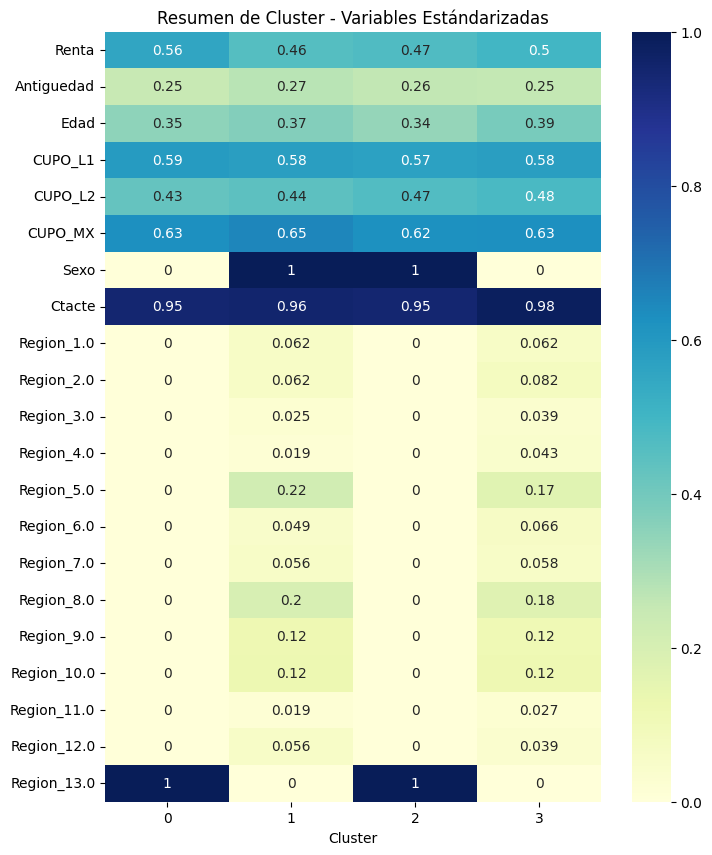

In [118]:
# Visualización de los centroides
plt.figure(figsize=(8, 10))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Resumen de Cluster - Variables Estándarizadas')
plt.show()


In [121]:
# Mostrar varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por cada componente: {explained_variance}')
print(f'Varianza total explicada por los primeros 2 componentes: {explained_variance.sum()}')


Varianza explicada por cada componente: [0.58425367 0.1112575 ]
Varianza total explicada por los primeros 2 componentes: 0.6955111676593217


Centroides de los Clusters:
Los centroides de los 4 clusters  están ubicados en las siguientes coordenadas en las dos dimensiones principales (PC1 y PC2) :
Centroides de los clusters:

  Cluster    PC1       PC2

* 0    -1.218436     0.274680
* 1    0.997617     0.556940
* 2   -0.194688     -0.743537
* 3    1.145128     -0.451988

Estos centroides representan la media de las posiciones de los puntos dentro de cada cluster en el espacio reducido de dos dimensiones. La distribución de los centroides muestra una separación clara entre los clusters, lo que demuestra que el modelo ha identificado grupos con características distintas en estas dos componentes principales.

**Silhouette Score: 0.964**

El Silhouette Score de 0.964 es un excelente valor. Este puntaje indica que los puntos dentro de los clusters están muy bien definidos y las separados ,entre los clusters es muy claras. Los valores de Silhouette Score cercanos a 1 indican una excelente formación de clusters, el modelo K-Meansel modelo está realizando un buen trabajo en agrupar a los clientes de manera coherente.


---


 **Inercia (SSE): 1.994**

La Inercia (o Error Cuadrático de Suma) es de 1.994, lo que refleja la calidad del ajuste del modelo.Los puntos dentro de cada cluster están cerca de sus centroides, lo que es una señal de que los clientes dentro de cada grupo tienen comportamientos y características similares, lo que facilita la segmentación efectiva.

**Analisis**

**Cluster 0:**
Valores elevados en Ctacte cerca de 0.95 y Region_1.0 0.95, lo que indica indicar que los miembros de este cluster tienen una alta probabilidad de tener cuenta corriente activa y la región predominantemente es 1.0.
En Sexo el valor de 0 indica  que este grupo podría estar compuesto principalmente por hombres. La variable Renta es alta, Antigüedad es baja y Edad es media. Tambien las variables CUPO_L1, CUPO_L2, CUPO_MX tienen valores moderados

Este grupo parece ser un segmento de clientes jóvenes con cuentas corrientes activas, que tienen un perfil de ingresos medios a altos. Están mayormente concentrados en una región 1.0, lo que puede ser relevante para personalizar campañas locales. La edad y la antigüedad baja sugieren que son clientes relativamente nuevos, pero con un nivel de ingresos adecuado.


---


**Cluster 1:**

Similar al Cluster 0, con Ctacte y Region_1.0 altos.
Se visualiza una Renta media, Antigüedad baja, Edad en torno a la media.
CUPO_L1, CUPO_L2, CUPO_MX son moderados, predominantemente femenino

 Este grupo de clientes es similar al Cluster 0 en términos de características generales como renta y antigüedad, pero parece haber una ligera diferencia en cuanto a la distribución de Sexo, lo que indica que es un grupo con mayor  mujeres. Este segmento indica  comportamientos de compra ligeramente diferentes, y también está concentrado en la misma región.


---


**Cluster 2:**

Este cluster muestra una mayor dispersión en las variables de Region y CUPO_L2, lo que puede indica  una mayor diversidad o variedad  en los puntos del cluster.
La variable Sexo, parece estar distribuido en una proporción significativa con valor 0, lo que indica que son hombres.

Las variables de Renta demuestra valores moderados, Antigüedad es media , Edad se ve Media a alta
CUPO_L1, CUPO_L2, CUPO_MX indica  moderados a altos
La distribución de Sexo es equilibrada.

La Ctacte es Alto, lo que indica clientes con cuentas activas, que se ubican en todas las regiones.

 Este grupo parece estar compuesto por clientes de diferentes edades y ubicaciones geográficas. Tienen un perfil de renta y antigüedad media, lo que podría indicar que son clientes con un historial y un mayor consumo de productos financieros demostrado por como CUPO_L2 y CUPO_MX. La diversidad geográfica indica que este grupo podría tener un comportamiento menos dependiente de una región específica. Este segmento podría ser ideal para estrategias de fidelización y productos de crédito personalizados.


---


**Cluster 3:**

Este grupo parece estar compuesto por personas con características más parecidas en algunas de las variables.
 El CUPO_MX, que tiene un valor relativamente alto en comparación con otros clusters.

 Este segmento parece estar compuesto por clientes con rentas más bajas y con un perfil de antigüedad media, lo que sugiere que podrían ser clientes que se han unido hace poco, pero con ingresos algo limitados. Tienen un uso moderado de productos de bancarios y están distribuidos geográficamente en diversas regiones. Las estrategias para este grupo podrían centrarse en productos financieros accesibles o con beneficios específicos que mejoren su capacidad de pago y aumenten la lealtad.


---


Conclusión:
Los resultados sugieren que el modelo K-Means ha logrado una buena segmentación de los datos, con clusters claramente diferenciados, lo que se refleja en las métricas (Silhouette Score alto y baja inercia). Cada cluster parece estar asociado con diferentes patrones en las variables de interés, como la renta, antigüedad, cupos de crédito y la región, lo que puede ser útil para análisis posteriores, como la segmentación de clientes o la creación de estrategias de marketing personalizadas.

# PCA con dos componentes

Componentes principales:
 [[ 0.00277752 -0.00433043 -0.04663433 -0.0043326  -0.02147156 -0.01016367
   0.46219902 -0.03151751 -0.04655788 -0.0603112  -0.02633609 -0.02803052
  -0.16834777 -0.04723672 -0.04325674 -0.16629984 -0.09673439 -0.1011471
  -0.01867752 -0.03034277  0.83327854]
 [-0.09650492  0.02787151  0.00722831 -0.01636666  0.02829166  0.00335445
   0.88134477  0.00118692  0.02269984  0.0193237   0.00621382  0.00324119
   0.11453469  0.01554085  0.02002029  0.09664596  0.04890707  0.05236365
   0.00511112  0.02237419 -0.42697637]]

Varianza explicada por cada componente: [0.22465971 0.19322957]

Datos transformados (PCA):
       Componente_1  Componente_2
0         0.164275     -0.567035
1        -0.758955     -0.082796
2         0.154709     -0.593022
3         0.163862     -0.567967
4        -0.845076     -0.070693
...            ...           ...
1069      0.149477     -0.538680
1070     -0.845785      0.035964
1071      0.160235     -0.565335
1072      0.143221     -0.53

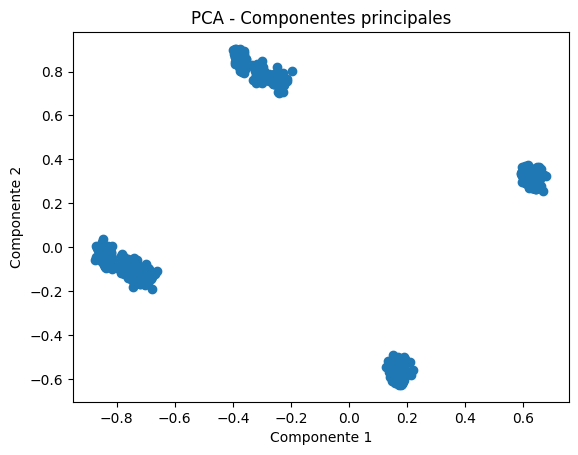

In [65]:
from sklearn.decomposition import PCA
# Paso 1: Aplicar PCA
pca = PCA(n_components=2)  # Definir el número de componentes principales (2 en este caso)
X_pca = pca.fit_transform(X)  # Aplica PCA a los datos escalados

# Paso 2: Ver los resultados
print("Componentes principales:\n", pca.components_)
print("\nVarianza explicada por cada componente:", pca.explained_variance_ratio_)

# Paso 3: Convertir el resultado PCA en un DataFrame para visualización
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Mostrar el DataFrame resultante con las componentes principales
print("\nDatos transformados (PCA):\n", pca_df)

# Paso 4: Visualizar los resultados en un gráfico de dispersión
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'])
plt.title('PCA - Componentes principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [57]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))

[0.22465971 0.19322957 0.08383418 0.06831764]
suma: 0.4178892769530173


Vemos que al aplicar PCA con dos componentes, estos explican casi la mitad de la varianza total, especificamente el 45.8%, no necesariamente es malo, podemos usarlo para modelar un kmeans en base a esto, pero veremos opciones de 3 componentes y 4 componentes para comparar resultados y ver que tal explican la varianza total

Componentes principales:
 [[ 0.00277752 -0.00433043 -0.04663433 -0.0043326  -0.02147156 -0.01016367
   0.46219902 -0.03151751 -0.04655788 -0.0603112  -0.02633609 -0.02803052
  -0.16834777 -0.04723672 -0.04325674 -0.16629984 -0.09673439 -0.1011471
  -0.01867752 -0.03034277  0.83327854]
 [-0.09650492  0.02787151  0.00722831 -0.01636666  0.02829166  0.00335445
   0.88134477  0.00118692  0.02269984  0.0193237   0.00621382  0.00324119
   0.11453469  0.01554085  0.02002029  0.09664596  0.04890707  0.05236365
   0.00511112  0.02237419 -0.42697637]
 [ 0.24521735 -0.41129942 -0.12390545  0.43412986 -0.14266562  0.72142028
   0.03953836  0.14081879 -0.00799125 -0.0228732  -0.0172115  -0.01011032
   0.03979643 -0.01443805  0.00401019 -0.00779703  0.03692086 -0.00601502
   0.01675085  0.00120845 -0.0122504 ]]

Varianza explicada por cada componente: [0.22465971 0.19322957 0.08383418]

Datos transformados (PCA):
       Componente_1  Componente_2  componente_3
0         0.164275     -0.567035      0

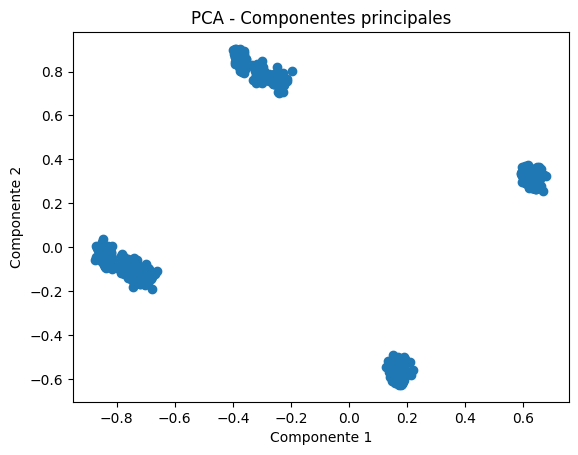

In [58]:
from sklearn.decomposition import PCA
# Paso 1: Aplicar PCA
pca = PCA(n_components=3)  # Definir el número de componentes principales (2 en este caso)
X_pca = pca.fit_transform(X)  # Aplica PCA a los datos escalados

# Paso 2: Ver los resultados
print("Componentes principales:\n", pca.components_)
print("\nVarianza explicada por cada componente:", pca.explained_variance_ratio_)

# Paso 3: Convertir el resultado PCA en un DataFrame para visualización
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2','componente_3'])

# Mostrar el DataFrame resultante con las componentes principales
print("\nDatos transformados (PCA):\n", pca_df)

# Paso 4: Visualizar los resultados en un gráfico de dispersión
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'])
plt.title('PCA - Componentes principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [59]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:3]))

[0.22465971 0.19322957 0.08383418]
suma: 0.5017234602822567


El PCA de 3 componentes explica un 50 % de la varianza total, lo que significa que en relacion al anterior resultado los dos primeros componentes bajaron rendimiento y el tercero no logra explicar mucho mas en comparacion con los dos primeros se queda atras, por lo que en relacion a que los componentes en terminos idoneos deberian explicar entre el 70% y 80%, haremos un contraste con el pca de 4 componentes y 2 componentes

# PCA con cuatro componentes para explicar el modelo

Componentes principales:
 [[ 2.77752317e-03 -4.33043446e-03 -4.66343314e-02 -4.33259613e-03
  -2.14715614e-02 -1.01636651e-02  4.62199021e-01 -3.15175113e-02
  -4.65578815e-02 -6.03111987e-02 -2.63360937e-02 -2.80305248e-02
  -1.68347769e-01 -4.72367213e-02 -4.32567350e-02 -1.66299842e-01
  -9.67343917e-02 -1.01147098e-01 -1.86775172e-02 -3.03427728e-02
   8.33278545e-01]
 [-9.65049160e-02  2.78715102e-02  7.22830894e-03 -1.63666635e-02
   2.82916583e-02  3.35444557e-03  8.81344773e-01  1.18691546e-03
   2.26998372e-02  1.93237049e-02  6.21381702e-03  3.24119146e-03
   1.14534693e-01  1.55408535e-02  2.00202881e-02  9.66459602e-02
   4.89070651e-02  5.23636535e-02  5.11111904e-03  2.23741886e-02
  -4.26976372e-01]
 [ 2.45217350e-01 -4.11299416e-01 -1.23905446e-01  4.34129857e-01
  -1.42665624e-01  7.21420277e-01  3.95383552e-02  1.40818792e-01
  -7.99124667e-03 -2.28731996e-02 -1.72115032e-02 -1.01103181e-02
   3.97964264e-02 -1.44380546e-02  4.01019339e-03 -7.79702956e-03
   3.6920859

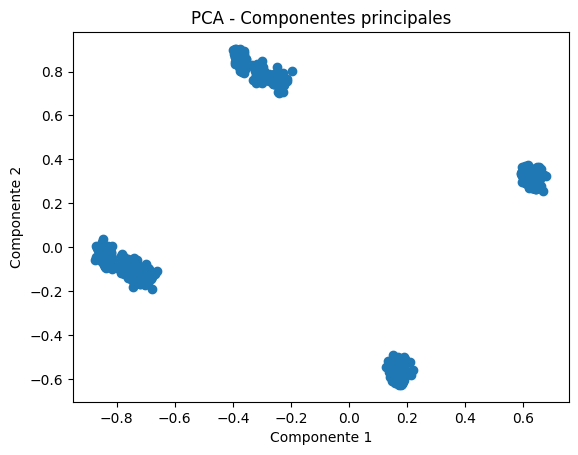

In [66]:
# Paso 1: Aplicar PCA
pca = PCA(n_components=4)  # Definir el número de componentes principales (4 en este caso)
X_pca = pca.fit_transform(X)  # Aplica PCA a los datos escalados

# Paso 2: Ver los resultados
print("Componentes principales:\n", pca.components_)
print("\nVarianza explicada por cada componente:", pca.explained_variance_ratio_)

# Paso 3: Convertir el resultado PCA en un DataFrame para visualización
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2', 'Componente_3', 'Componente_4'])

# Mostrar el DataFrame resultante con las componentes principales
print("\nDatos transformados (PCA):\n", pca_df)

# Paso 4: Visualizar los resultados en un gráfico de dispersión de las dos primeras componentes
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'])
plt.title('PCA - Componentes principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


Estos 4 componentes capturan un 77% de la varianza total, por lo que es mas util que uno de 2 componentes por ejemplo que explican 46%, podemos modelar K-means con ambos para ver las diferencias en las metricas como silhouette e inercia entre uno y otro

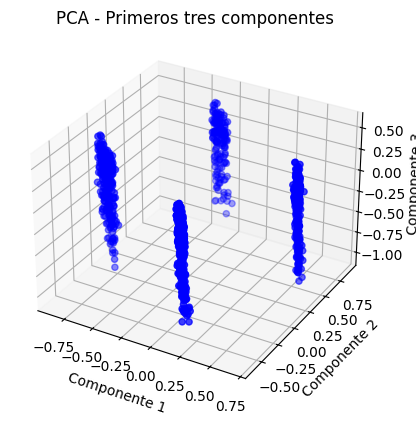

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Gráfico 3D de las primeras tres componentes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['Componente_1'], pca_df['Componente_2'], pca_df['Componente_3'], c='blue', marker='o')
ax.set_title('PCA - Primeros tres componentes')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

plt.show()

# K-Means

K-means con ejecucion de dos componentes de pca, numero de clusters 3

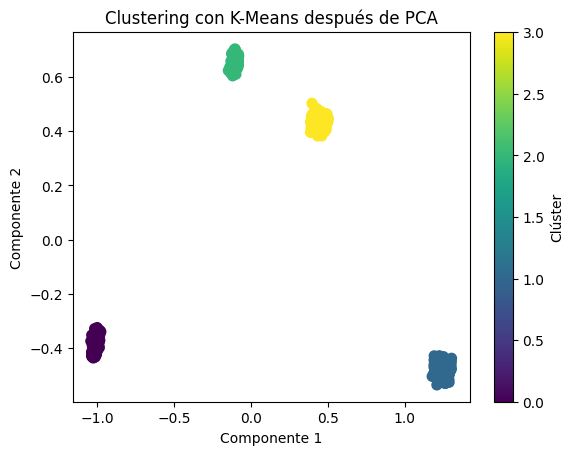


Centros de los clústeres:
 [[-1.01219612 -0.39555048]
 [ 1.24354948 -0.47955633]
 [-0.10586245  0.64935087]
 [ 0.44692884  0.43151875]]

Silhouette Score: 0.9592057506074534

Inercia (SSE) del modelo: 0.9339872550728409

Etiquetas de los clústeres para cada punto:
 Cluster
0    356
1    257
2    299
3    162
Name: count, dtype: int64

Resumen de los clústeres (promedios de las variables):



,Renta,Antiguedad,Edad,CUPO_L1,CUPO_L2,CUPO_MX,Sexo,Ctacte,Region_1.0,Region_2.0,...,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,Region_10.0,Region_11.0,Region_12.0,Region_13.0
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.557806,0.246534,0.348315,0.591336,0.426588,0.627793,0.0,0.946629,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.497727,0.253953,0.390258,0.578185,0.482529,0.627855,0.0,0.984436,0.062257,0.081712,...,0.042802,0.171206,0.066148,0.058366,0.175097,0.116732,0.120623,0.027237,0.038911,0.0
2,0.472145,0.258023,0.337483,0.574125,0.466552,0.623087,1.0,0.946488,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,0.459530,0.273706,0.367856,0.581295,0.443458,0.651430,1.0,0.956790,0.061728,0.061728,...,0.018519,0.216049,0.049383,0.055556,0.197531,0.117284,0.123457,0.018519,0.055556,0.0


In [122]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Paso 3: Convertir el resultado PCA en un DataFrame
pca_df3 = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Paso 4: Aplicar K-Means
kmeans = KMeans(n_clusters=4, max_iter=500, random_state=42)  # Número de clústeres: 5
pca_df3['Cluster'] = kmeans.fit_predict(X_pca)  # Asignar los clústeres a cada punto

# Paso 5: Visualizar los clústeres
plt.scatter(pca_df3['Componente_1'], pca_df3['Componente_2'], c=pca_df3['Cluster'], cmap='viridis', s=50)
plt.title('Clustering con K-Means después de PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clúster')
plt.show()

# (Opcional) Mostrar los centros de los clústeres
centros = kmeans.cluster_centers_
print("\nCentros de los clústeres:\n", centros)

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print("\nSilhouette Score:", silhouette_avg)

# Calcular la inercia (SSE)
sse = kmeans.inertia_
print("\nInercia (SSE) del modelo:", sse)

# Contar la cantidad de puntos en cada clúster
cluster_counts = pca_df3['Cluster'].value_counts().sort_index()
print("\nEtiquetas de los clústeres para cada punto:\n", cluster_counts)

# Asumimos que 'df1' contiene las variables originales
# Agregamos la etiqueta del cluster al DataFrame original
X['Cluster'] = kmeans.labels_

# Resumen de promedios por clúster
cluster_summary = X.groupby('Cluster').mean()
print("\nResumen de los clústeres (promedios de las variables):\n")
cluster_summary


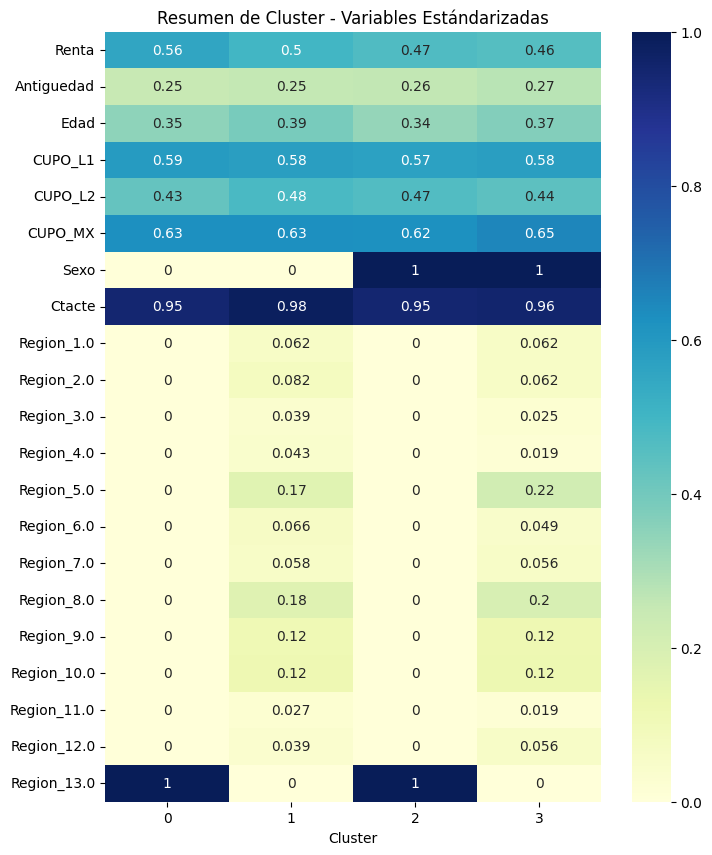

In [123]:
# Visualización de los centroides
plt.figure(figsize=(8, 10))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Resumen de Cluster - Variables Estándarizadas')
plt.show()


In [67]:
from sklearn.cluster import KMeans

# Paso 3: Convertir el resultado PCA en un DataFrame
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Paso 4: Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Número de clústeres: 3 (puedes ajustarlo)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)  # Asignar los clústeres a cada punto

# Paso 5: Visualizar los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Clustering con K-Means después de PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clúster')
plt.show()

# (Opcional) Mostrar los centros de los clústeres
centros = kmeans.cluster_centers_
print("\nCentros de los clústeres:\n", centros)

ValueError: Shape of passed values is (1074, 4), indices imply (1074, 2)

In [ ]:
print("Inercia (SSE):", kmeans.inertia_)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca, kmeans.labels_)
print("Coeficiente de Silhouette:", silhouette)


Inercia (SSE): 131.418543837669
Coeficiente de Silhouette: 0.7967502603211687


obtenemos con 3 cluster, 131 de inercia y un silhouette de 79, bastante alto este ultimo, lo cual indica que los clusters estan bien separados y definidos unos de otros, esto es una buena medida, en relacion a la inercia, la compararemos con la de un modelo de k-means con 5 clusters para determinar cualo es mejor pero hasta el momento el valor es alto, por lo que esperamos baje con una mayor cantidad de clusters ya que este numero indica que no tiene tan buen agrupamiento, a menor inercia mejor agrupamiento entre los puntos respecto de sus centroides

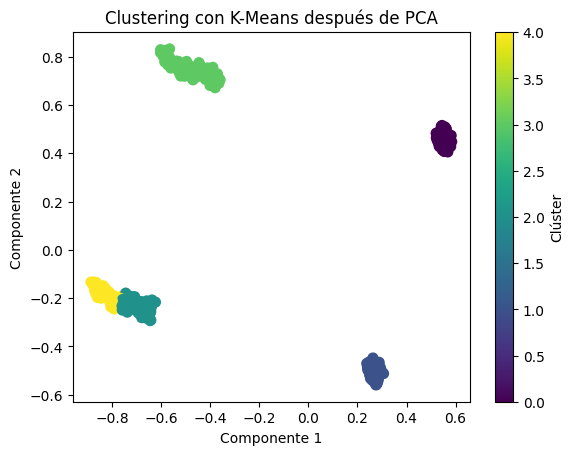


Centros de los clústeres:
 [[ 0.54512988  0.44930017]
 [ 0.26358573 -0.51195516]
 [-0.69875811 -0.23511776]
 [-0.48022399  0.74970113]
 [-0.83362139 -0.18371997]]


In [ ]:
from sklearn.cluster import KMeans

# Paso 3: Convertir el resultado PCA en un DataFrame
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Paso 4: Aplicar K-Means
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=42)  # Número de clústeres: 3 (puedes ajustarlo)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)  # Asignar los clústeres a cada punto

# Paso 5: Visualizar los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Clustering con K-Means después de PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clúster')
plt.show()

# (Opcional) Mostrar los centros de los clústeres
centros = kmeans.cluster_centers_
print("\nCentros de los clústeres:\n", centros)

In [ ]:
print("Inercia (SSE):", kmeans.inertia_)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca, kmeans.labels_)
print("Coeficiente de Silhouette:", silhouette)

Inercia (SSE): 45.54859136664178
Coeficiente de Silhouette: 0.905713951129739


Al ejecutar un k-means, con 5 clusters, baja la inercia a 45 indicando que obtenemos un mejor agrupamiento de parte de los puntos respecto de sus centroides, ademas el indice silhouette, ha subido 11 puntos respecto del k-means anterior lo que indica que los clusters estan mucho mejor definidos que el modelo anterior con el valor de 90%

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
# Ajustar el modelo a los datos
kmeans.fit(X)
# Obtener las etiquetas (clusters asignados)
labels = kmeans.labels_
# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
# Obtener la inercia (SSE)
inertia = kmeans.inertia_
# Coeficiente de Silhouette (si deseas evaluar la calidad del clustering)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, labels)
# Mostrar resultados
print("Etiquetas (Clusters asignados):", labels)
print("Centroides de los clusters:", centroids)
print("Inercia (SSE):", inertia)
print("Coeficiente de Silhouette:", silhouette)

Etiquetas (Clusters asignados): [2 4 2 ... 4 4 0]
Centroides de los clusters: [[ 4.62051913e-01  2.52047371e-01  3.34638661e-01  5.21638657e-01
   4.69641696e-01  5.87417707e-01  1.00000000e+00  9.47169811e-01
   2.83018868e-02  1.69811321e-02  5.66037736e-03  7.54716981e-03
  -3.33066907e-16  1.69811321e-02  2.07547170e-02  1.00000000e-01
   3.05311332e-16  4.71698113e-02  7.54716981e-03  2.83018868e-02
   7.20754717e-01]
 [ 4.89888691e-01  6.49398705e-01  4.56439705e-01  5.87844787e-01
   5.20299501e-01  4.93894314e-01 -5.55111512e-16  8.95652174e-01
  -3.46944695e-17  1.38777878e-17  1.56125113e-17  1.56125113e-17
  -1.52655666e-16  2.08166817e-17  1.38777878e-17  1.11022302e-16
  -2.77555756e-17  8.32667268e-17  1.38777878e-17  4.51028104e-17
   1.00000000e+00]
 [ 5.26311621e-01  1.22651724e-01  2.93917135e-01  5.24250183e-01
   4.93821320e-01  6.19162263e-01  9.43689571e-16  9.89821883e-01
   5.89805982e-17 -1.04083409e-16  3.46944695e-17 -5.72458747e-17
  -3.19189120e-16 -1.94289

con el mismo numero de cluster y sin utilizar pca para reducir dimencionalidad y facilitar el analisis, el modelo de kmeans sin mayores ajustes empeora bastante sus metricas obteniendo una inercia de 1010 lo que significa que los puntos estan muy lejos de sus centroides y esto tambien reflejandose en el indice de silhouette, ya que tiene un 17% lo que significa que no hay mucha separacion entre clusters y estos estan muy mal definidos ya que no se logran diferencia unos de otros en terminos de puntos

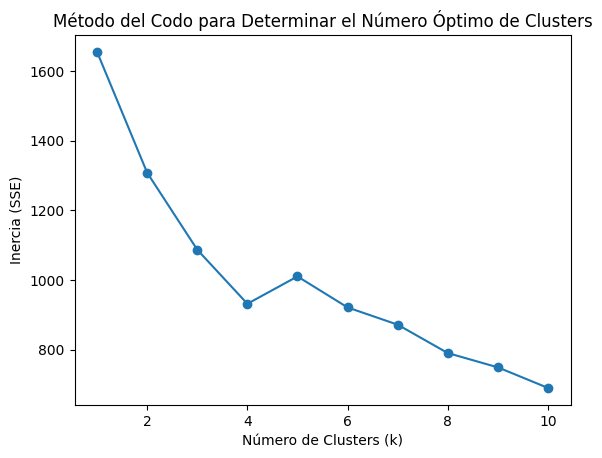

In [ ]:
k_range = range(1, 11)  # Probar de 1 a 10 clusters

# Calcular la inercia para cada valor de k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el "método del codo"
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

Como vemos el metodo del codo, no nos da una respuesta clara en relacion al grafico de donde establecer la cantidad de clusters, en este kmeans lo utilizamos para que nos ayude a determinar la cantidad, en los anteriores no ya que nos dio buenas metricas por lo tanto no fue tan necesario a nuestro criterio

se ve una diferencia notable a la hora de usar PCA ya que como tenemos varias variables, y este reduce la dimencionalidad escogiendo los componentes principales para ser analisis de forma mas eficiente.

ahora para verificar utilizaremos un numero mayor de iteraciones para analizar el resultado y si tiene algun efecto positivo en las metricas de desempeño

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=42)
# Ajustar el modelo a los datos
kmeans.fit(X)
# Obtener las etiquetas (clusters asignados)
labels = kmeans.labels_
# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
# Obtener la inercia (SSE)
inertia = kmeans.inertia_
# Coeficiente de Silhouette (si deseas evaluar la calidad del clustering)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, labels)
# Mostrar resultados
print("Etiquetas (Clusters asignados):", labels)
print("Centroides de los clusters:", centroids)
print("Inercia (SSE):", inertia)
print("Coeficiente de Silhouette:", silhouette)

Etiquetas (Clusters asignados): [2 4 2 ... 4 4 0]
Centroides de los clusters: [[ 4.62051913e-01  2.52047371e-01  3.34638661e-01  5.21638657e-01
   4.69641696e-01  5.87417707e-01  1.00000000e+00  9.47169811e-01
   2.83018868e-02  1.69811321e-02  5.66037736e-03  7.54716981e-03
  -3.33066907e-16  1.69811321e-02  2.07547170e-02  1.00000000e-01
   3.05311332e-16  4.71698113e-02  7.54716981e-03  2.83018868e-02
   7.20754717e-01]
 [ 4.89888691e-01  6.49398705e-01  4.56439705e-01  5.87844787e-01
   5.20299501e-01  4.93894314e-01 -5.55111512e-16  8.95652174e-01
  -3.46944695e-17  1.38777878e-17  1.56125113e-17  1.56125113e-17
  -1.52655666e-16  2.08166817e-17  1.38777878e-17  1.11022302e-16
  -2.77555756e-17  8.32667268e-17  1.38777878e-17  4.51028104e-17
   1.00000000e+00]
 [ 5.26311621e-01  1.22651724e-01  2.93917135e-01  5.24250183e-01
   4.93821320e-01  6.19162263e-01  9.43689571e-16  9.89821883e-01
   5.89805982e-17 -1.04083409e-16  3.46944695e-17 -5.72458747e-17
  -3.19189120e-16 -1.94289

comprobamos que el numero de iteraciones no hace diferencia alguna para este caso especifico, por lo que el mejor modelo hasta ahora es el de kmeans con uso de PCA en 5 clusters

Etiquetas (Clusters asignados): [2 0 2 ... 0 4 1]
Coeficiente de Silhouette: 0.30106303990698086


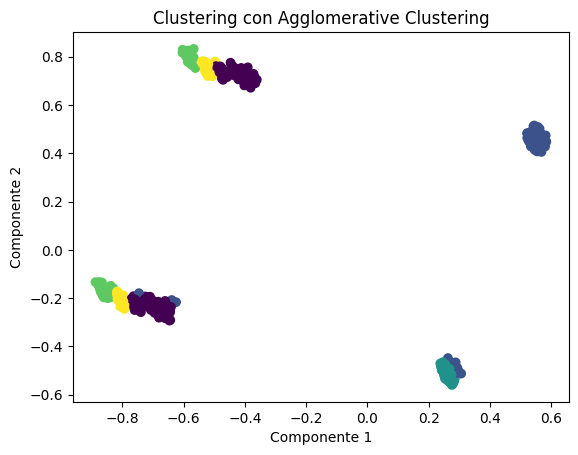

In [ ]:
# Importar las librerías necesarias
from sklearn.cluster import AgglomerativeClustering
# Crear el modelo de Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Puedes ajustar el número de clusters
# Ajustar el modelo
labels = agg_clustering.fit_predict(X)
# Evaluar la calidad del clustering usando el coeficiente de Silhouette
silhouette = silhouette_score(X, labels)
# Mostrar los resultados
print("Etiquetas (Clusters asignados):", labels)
print("Coeficiente de Silhouette:", silhouette)
# Si quieres visualizar los resultados (solo aplicable para 2D o 3D):
# Si X tiene muchas dimensiones, puedes usar PCA para reducir la dimensionalidad a 2D o 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Graficar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Clustering con Agglomerative Clustering")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


Comparamos mediante el uso del arreglo Z el cual no contiene las variables de Region que se desglosaron del one hot incoding debido a la representacion de sus categorias como regiones

Etiquetas (Clusters asignados): [0 0 0 ... 0 1 3]
Coeficiente de Silhouette: 0.2995028216149777


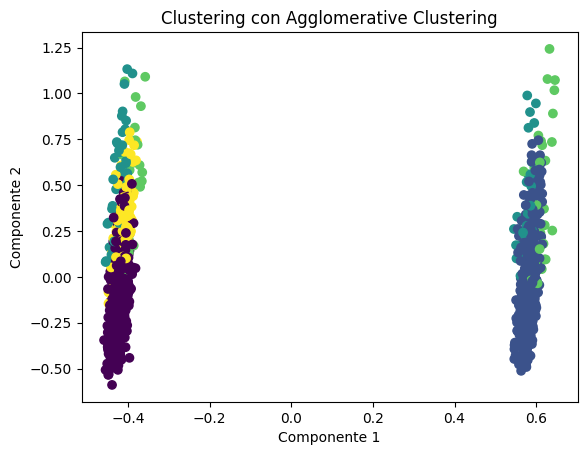

In [ ]:
# Importar las librerías necesarias
from sklearn.cluster import AgglomerativeClustering
# Crear el modelo de Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Puedes ajustar el número de clusters
# Ajustar el modelo
labels = agg_clustering.fit_predict(Z)
# Evaluar la calidad del clustering usando el coeficiente de Silhouette
silhouette = silhouette_score(Z, labels)
# Mostrar los resultados
print("Etiquetas (Clusters asignados):", labels)
print("Coeficiente de Silhouette:", silhouette)
# Si quieres visualizar los resultados (solo aplicable para 2D o 3D):
# Si X tiene muchas dimensiones, puedes usar PCA para reducir la dimensionalidad a 2D o 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Z)
# Graficar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Clustering con Agglomerative Clustering")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


PAra este tampoco hace mucha diferencia

# DBSCAN

1.0 distancia entre puntos por cluster y 40 la cantidad minima de puntos

Conteo de los clústeres:
  0    492
 2    358
-1    357
 3     63
 5     57
 4     52
 1     42
Name: count, dtype: int64


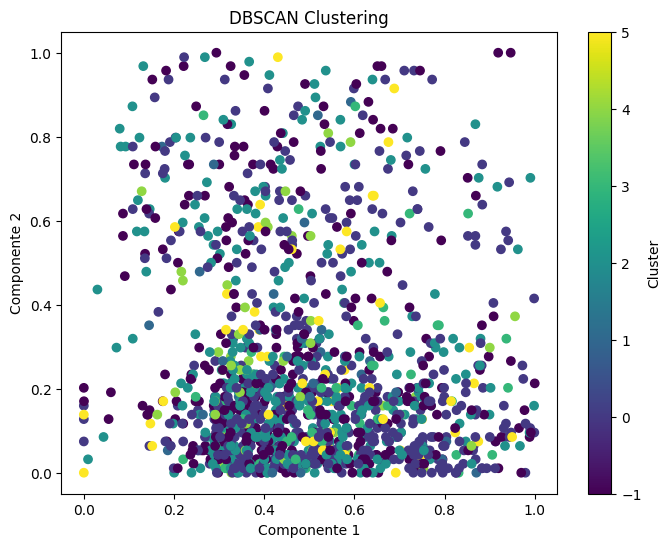

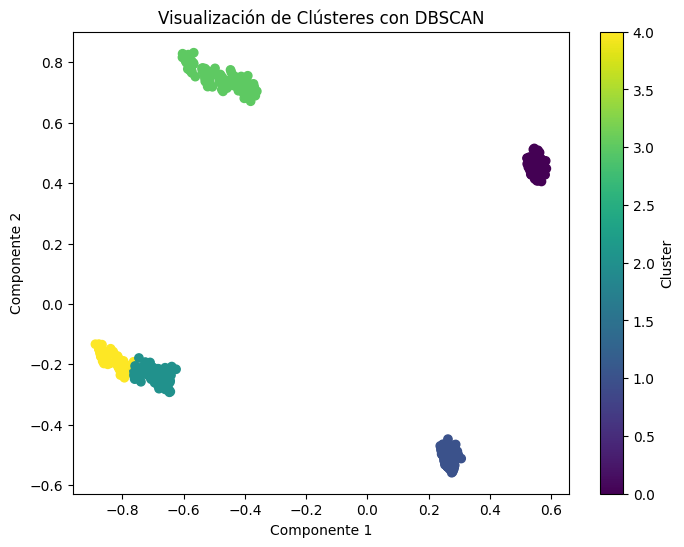

Índice de Silueta: 0.5039384526203947
Número de clústeres: 6


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=40)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




DBSCAN obtiene mejores metricas que los dos modelos anteriores sin usar PCA, el 50 porciento del indice de silhuouette indica que el cluster esta definido a un termino medio, variaremos los parametros de DBSCAN para obtener mejores metricas

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Prueba con diferentes combinaciones de eps y min_samples
eps_values = [0.3, 0.5, 0.7, 1.0]  # Valores de eps ajustados a los datos
min_samples_values = [5, 10, 20, 50, 100]  # Valores típicos de min_samples para muestras grandes

# Evaluar cada combinación
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_scaled_array)  # Asegúrate de usar los datos escalados

        # Contar el número de clústeres y puntos de ruido
        n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        noise_points = np.sum(dbscan.labels_ == -1)

        print(f"Para eps={eps} y min_samples={min_samples}:")
        print(f"Número de clústeres: {n_clusters}")
        print(f"Puntos de ruido: {noise_points}")
        print("-" * 30)


Para eps=0.3 y min_samples=5:
Número de clústeres: 18
Puntos de ruido: 639
------------------------------
Para eps=0.3 y min_samples=10:
Número de clústeres: 3
Puntos de ruido: 798
------------------------------
Para eps=0.3 y min_samples=20:
Número de clústeres: 2
Puntos de ruido: 876
------------------------------
Para eps=0.3 y min_samples=50:
Número de clústeres: 2
Puntos de ruido: 1124
------------------------------
Para eps=0.3 y min_samples=100:
Número de clústeres: 0
Puntos de ruido: 1421
------------------------------
Para eps=0.5 y min_samples=5:
Número de clústeres: 20
Puntos de ruido: 181
------------------------------
Para eps=0.5 y min_samples=10:
Número de clústeres: 12
Puntos de ruido: 303
------------------------------
Para eps=0.5 y min_samples=20:
Número de clústeres: 6
Puntos de ruido: 467
------------------------------
Para eps=0.5 y min_samples=50:
Número de clústeres: 2
Puntos de ruido: 645
------------------------------
Para eps=0.5 y min_samples=100:
Número de 

Generamos codigo para posibles combinaciones que no generen puntos de ruido que no son capturados por el modelo

Conteo de los clústeres:
  0     492
 2     358
 4      62
 10     57
 7      52
-1      45
 1      42
 3      35
 16     28
 14     25
 12     24
 13     24
 9      24
 15     22
 19     18
 21     16
 11     15
 6      15
 17     14
 20     13
 18     11
 8      10
 5       7
 23      7
 22      5
Name: count, dtype: int64


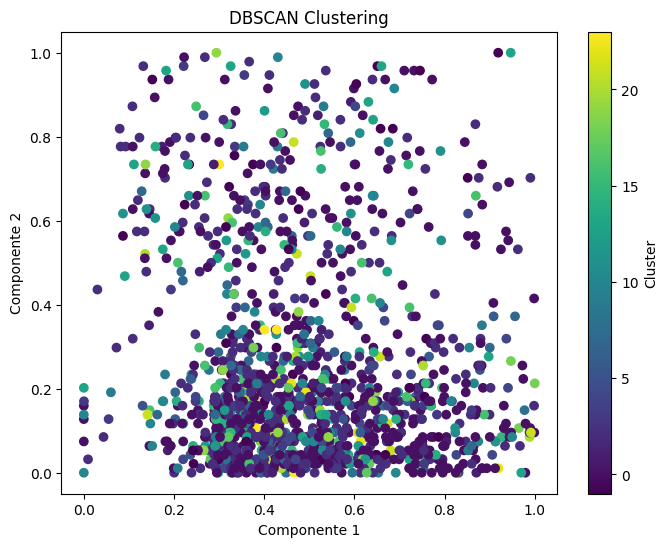

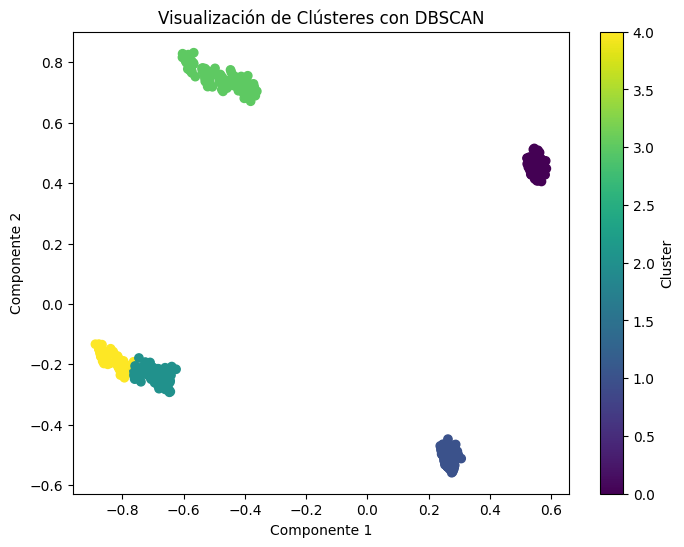

Índice de Silueta: 0.34411583548412644
Número de clústeres: 24


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




Esta combinacion genera demaciados cluster lo cual no necesariamente es malo a menos que tenga una metrica de calidad predictiva baja como lo es este caso, con un silhouette de 34%, procederemos a buscar otra combinacion, esta se habia escogido debido a que tenia menor puntos de ruido, pero no fue la mejor opcion

Conteo de los clústeres:
  0    492
-1    399
 1    358
 2     63
 4     57
 3     52
Name: count, dtype: int64


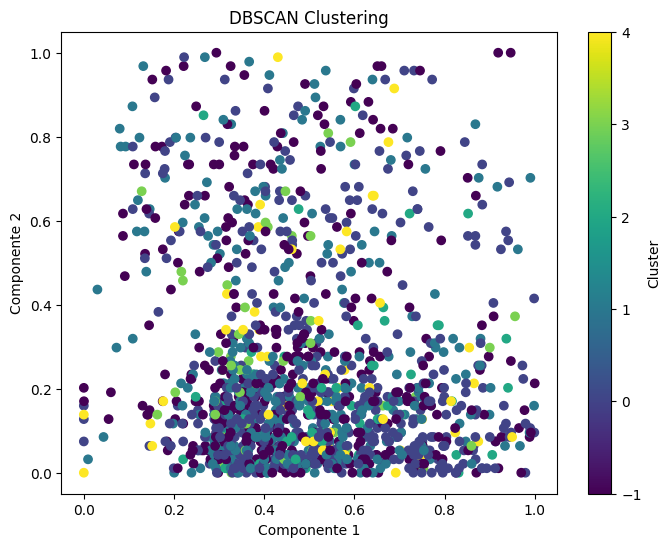

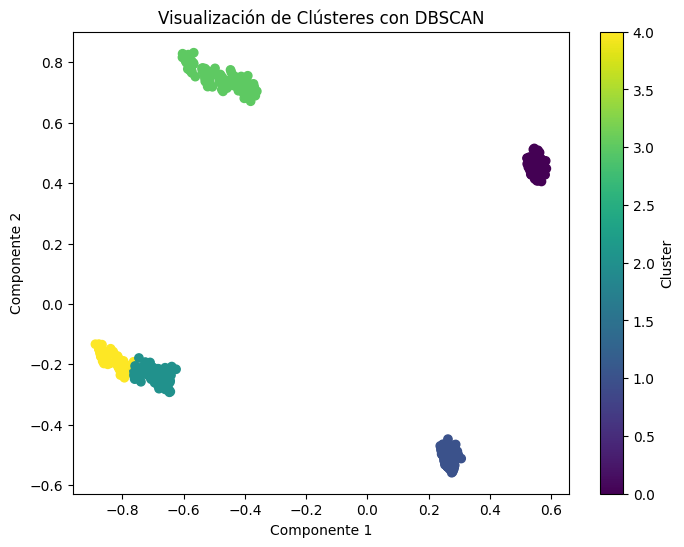

Índice de Silueta: 0.613985960337786
Número de clústeres: 5


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=50)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




teniendo en cuenta que los parametros que variamos son: eps es la distancia maxima entre puntos de un cluster y min_samples es el minimo de puntos por cluster, al aumentar este minimo con respecto del primer dbscan a 50 y mantener el eps a 1.0 esta configuracion baja un cluster la cantidad y aumenta el indice silhouette, esto beneficioso para el modelo, probaremos otra combinacion, esto pouede deberse a que la forma de los cluster se ajuste con el estilo de dbscan

Conteo de los clústeres:
 -1    571
 0    492
 1    358
Name: count, dtype: int64


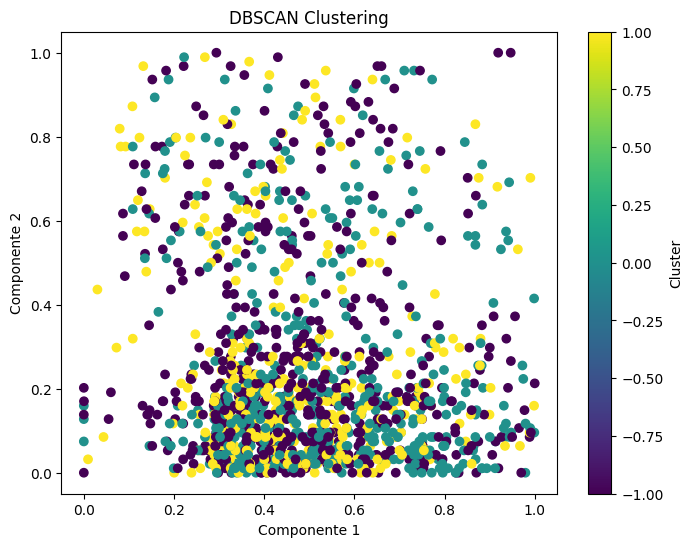

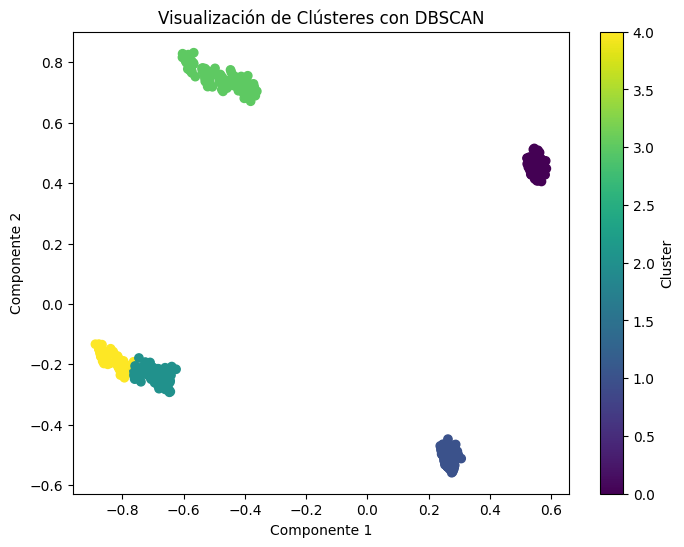

Índice de Silueta: 0.7223515890253143
Número de clústeres: 2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=70)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




1.0 y 70 nos arroja una metrica de 72 porciento conformando dos clusters, sobre es numero no da mejoras en los resultados y sobre 100 se pasaria de los estandares de la industria y segun los mismos estandares de las combinaciones multiples con el codigo anterior